In [1]:
import pandas_datareader.data as web
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# create start and end date variables
start = datetime.datetime(2011,3,17)
end = datetime.datetime(2021,3,17)

In [3]:
qqq = web.DataReader('QQQ', 'yahoo', start, end)
splg = web.DataReader('SPLG', 'yahoo', start, end)
dia = web.DataReader('DIA', 'yahoo', start, end)
acwi = web.DataReader('ACWI', 'yahoo', start, end)

In [4]:
splg

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2011-03-17  14.885000  14.885000  14.885000  14.885000        0.0  12.245197
2011-03-18  15.095000  15.005000  15.057500  15.005000     5600.0  12.392200
2011-03-21  15.240000  15.185000  15.187500  15.217500   161600.0  12.567697
2011-03-22  15.237500  15.172500  15.215000  15.192500    20800.0  12.547050
2011-03-23  15.240000  15.240000  15.240000  15.240000     4000.0  12.586277
...               ...        ...        ...        ...        ...        ...
2021-03-11  46.529999  46.080002  46.119999  46.290001  2368000.0  46.290001
2021-03-12  46.360001  46.009998  46.099998  46.349998  3878200.0  46.349998
2021-03-15  46.660000  46.110001  46.380001  46.630001  2956400.0  46.630001
2021-03-16  46.790001  46.459999  46.709999  46.580002  3032800.0  46.580002
2021-03-17  46.820000  46.250000  46.410000  46.720001  4077900.0  46.720001

[2517 rows x 6 columns]

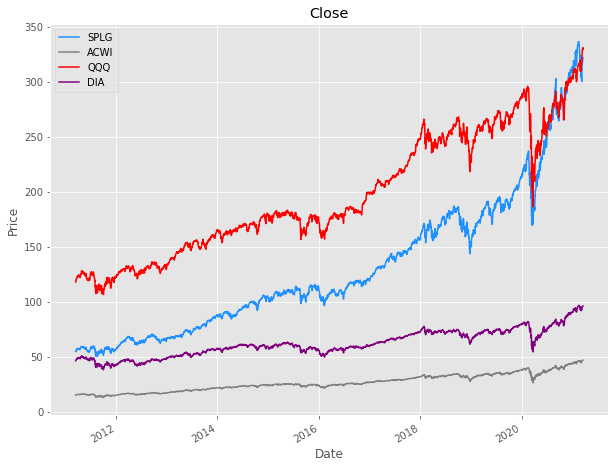

In [5]:
qqq.Close.plot(figsize=(10,8), c='dodgerblue', label='SPLG')
splg.Close.plot(c='grey', label='ACWI')
dia.Close.plot(c='red', label='QQQ')
acwi.Close.plot(c='purple', label='DIA')
plt.title('Close')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
# dataframe concatenation
stocks = pd.concat([qqq.Close, splg.Close, dia.Close, acwi.Close], axis=1)
stocks.columns = ['QQQ', 'SPLG', 'DIA', 'ACWI']

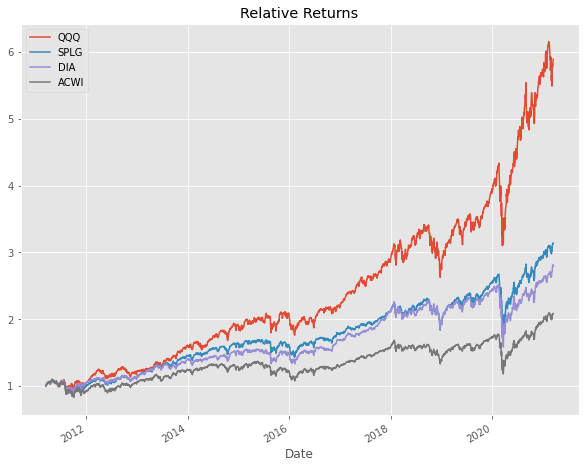

In [7]:
returns = (stocks/stocks.iloc[0])

returns.plot(figsize=(10,8))
plt.title('Relative Returns')
plt.show()

### What if I buy all of them

In [8]:
N = 4
returns['Portfolio'] = returns.iloc[:,0:N].sum(axis=1) / N

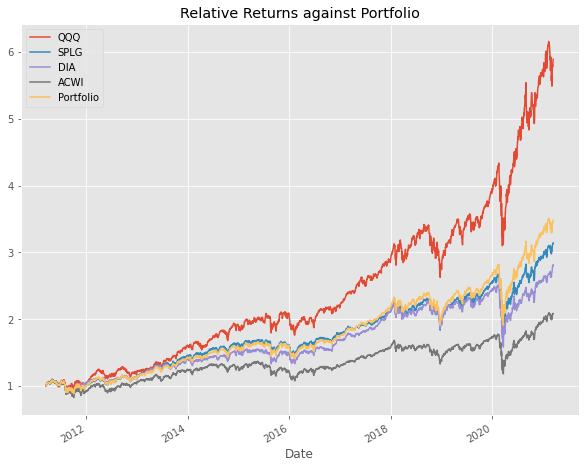

In [9]:
# plot relative returns against a portfolio with all etfs
returns.plot(figsize=(10,8))
plt.title('Relative Returns against Portfolio')
plt.show()

In [10]:
# calculate daily percent change and volatility
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252)
vols

QQQ          0.199607
SPLG         0.175696
DIA          0.175701
ACWI         0.177185
Portfolio    0.175848
dtype: float64

In [11]:
returns

QQQ      SPLG       DIA      ACWI  Portfolio
Date                                                         
2011-03-17  1.000000  1.000000  1.000000  1.000000   1.000000
2011-03-18  0.996340  1.008062  1.004928  1.011726   1.005264
2011-03-21  1.015553  1.022338  1.020223  1.029316   1.021857
2011-03-22  1.013724  1.020658  1.018948  1.030619   1.020987
2011-03-23  1.019396  1.023849  1.024981  1.031488   1.024928
...              ...       ...       ...       ...        ...
2021-03-11  5.819579  3.109842  2.764296  2.070575   3.441073
2021-03-12  5.772369  3.113873  2.789617  2.066667   3.435631
2021-03-15  5.834034  3.132684  2.804741  2.077742   3.462300
2021-03-16  5.866056  3.129325  2.794290  2.077524   3.466799
2021-03-17  5.890210  3.138730  2.810519  2.083605   3.480766

[2517 rows x 5 columns]

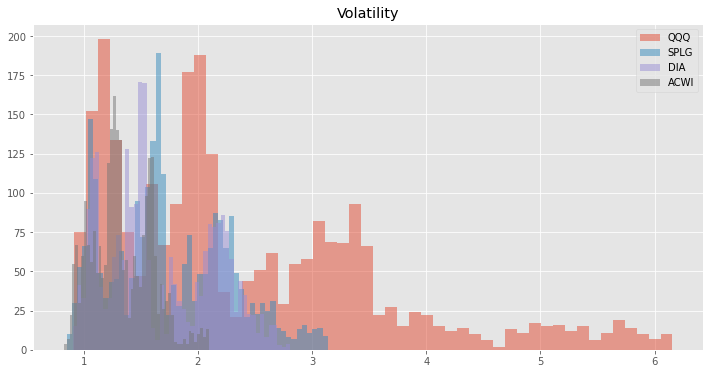

In [12]:
# wider for QQQ: more volatile
returns.QQQ.hist(bins=50, figsize=(12,6), label='QQQ', alpha=0.5)
returns.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
returns.DIA.hist(bins=50, label='DIA', alpha=0.5)
returns.ACWI.hist(bins=50, label='ACWI', alpha=0.5)
plt.title('Volatility')
plt.legend()
plt.show()

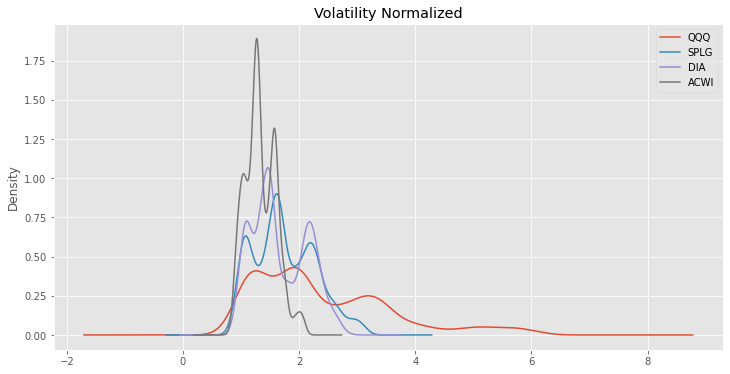

In [13]:
# plot a histogram kernel for clarity (probability density function; normalized)
returns.QQQ.plot(kind='kde', label='QQQ', figsize=(12,6))
returns.SPLG.plot(kind='kde', label='SPLG')
returns.DIA.plot(kind='kde', label='DIA')
returns.ACWI.plot(kind='kde', label='ACWI')
plt.title('Volatility Normalized')
plt.legend()
plt.show()

### Simulate forwards

In [14]:
prf_returns = (stocks.pct_change() +1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()

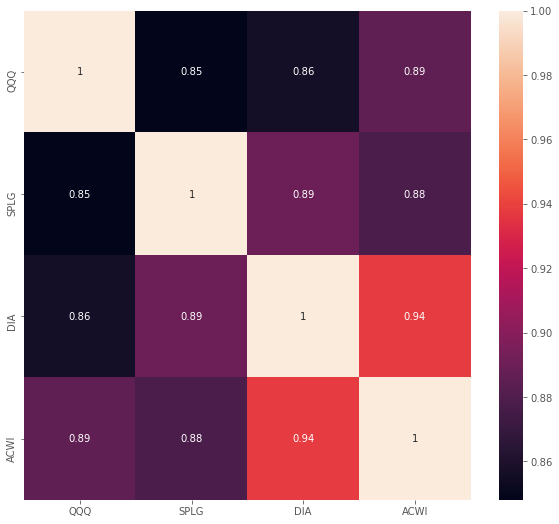

In [15]:
plt.figure(figsize=(10,9))
sns.heatmap(corr, annot=True)
plt.show()

### Monte Carlo Simulation
Picking random days, combining them, to get a statistical equivalent simulation

In [16]:
simulated = pd.DataFrame([((prf_returns.iloc[random.choices(range(len(prf_returns)), k=60)])\
                           .mean(axis=1)).cumprod().values for x in range(1000)]).T
simulated.head()

0         1         2         3         4         5         6    \
0  0.987984  0.997186  0.995693  1.005651  0.993380  1.011147  1.001275   
1  0.994067  0.999583  0.992164  1.010790  0.985146  1.010898  1.020635   
2  1.010420  0.947361  0.994120  1.009148  0.994129  1.009462  1.021872   
3  1.001913  0.944811  0.997665  1.010643  0.993955  1.012335  1.036480   
4  1.006361  0.937207  0.990841  1.016866  0.990604  1.000415  1.044390   

        7         8         9    ...       990       991       992       993  \
0  0.995320  0.996347  0.996369  ...  1.002355  0.998506  0.995981  0.992022   
1  0.988643  0.995996  0.989630  ...  0.997717  1.000040  0.987559  0.988398   
2  0.996618  0.993116  1.003988  ...  0.992827  0.999413  0.972179  0.986566   
3  0.993945  0.998184  1.006025  ...  0.991351  0.996021  0.975252  0.975977   
4  0.992954  1.000342  1.021185  ...  0.970025  0.998169  0.986060  0.977452   

        994       995       996       997       998       999  
0  0.998250  1.007419  1.002692  0.982214  0.990752  1.001833  
1  0.999551  1.008492  1.006339  0.983762  0.992362  1.014775  
2  1.001637  1.015417  1.009321  0.964414  0.995971  1.024117  
3  1.001230  0.994472  1.024992  0.969610  1.001061  1.031822  
4  1.008303  0.995380  1.023022  0.954829  1.003661  1.035250  

[5 rows x 1000 columns]

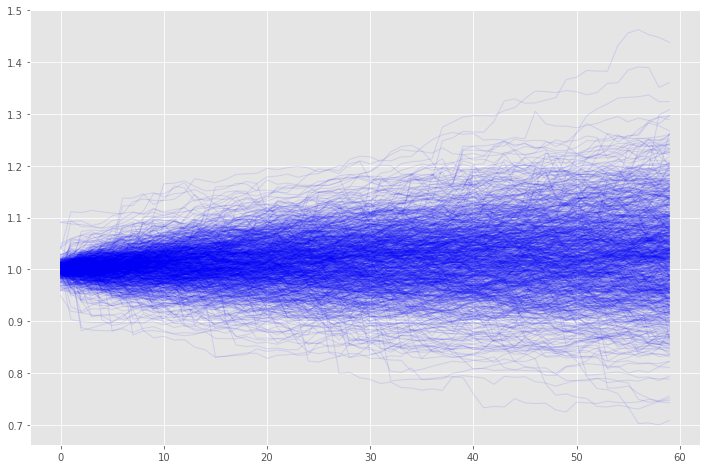

In [17]:
simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue', figsize=(12,8))
plt.show()

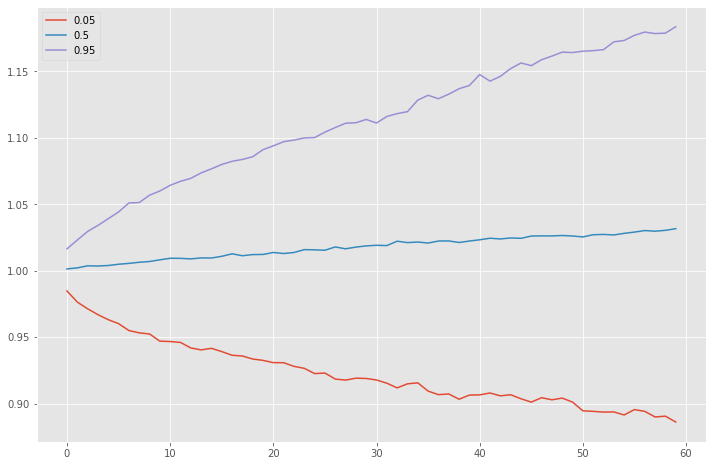

In [18]:
simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot(figsize=(12,8))
plt.show()